<a href="https://colab.research.google.com/github/YanisNC/AI-things/blob/master/Covid%20Banking%20Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How Covid Affected in Banking Transactions

For this problem I'll use a dataset of 15432 purchases of clients of a bank. The dataset includes transactions made from 1st January of 2019, to 4th October of 2020.

The variables are the following:
*   `fc_oper`: Date of the transaction (format: %y%m%d)
*   `channel`: Channel of the purchase:
  *   *Online*
  *   *Offline*
*   `amount`: Aggregate amount in €
*   `operations_number`: Number of transactions
*   `category_name`: Category of the purchase:
  *   *Car Maintenance & Repairs*
  *   *Gaming*
  *   *Supermarkets & Small Shops*
  *   *Digital Content & Media*
  *   *Lodging*
  *   *Tobacco, Alcohol & Others*
  *   *Hairdresser & Barbershop*
  *   *Fuel*
  *   *Bars & Discos*
  *   *Pharmacies, Opticians & Orthopedics*
  *   *Restaurants & Cafes*
  *   *DIY & Gardening*

### Import packages

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [54]:
df = pd.read_csv("movimientos.csv", sep=";", encoding="utf-8", parse_dates=True)

### Explore the Data

In [55]:
df.head()

,fc_oper,channel,amount,operations_number,category_name
0,190101,Offline,14013.98,106,Mantenimiento y Reparaciones Auto
1,190101,Online,30343.54,1607,Gaming
2,190101,Offline,319937.82,19080,Supermercados y Pequeño Comercio
3,190101,Online,24172.25,2395,Contenidos digitales y media
4,190101,Online,27734.58,315,Mantenimiento y Reparaciones Auto


#### Translate the category names from spanish to english

In [56]:
df['category_name'] = df['category_name'].replace({'Mantenimiento y Reparaciones Auto':'Car Maintenance & Repairs'          })
df['category_name'] = df['category_name'].replace({'Supermercados y Pequeño Comercio' :'Supermarkets & Small Shops'         })
df['category_name'] = df['category_name'].replace({'Contenidos digitales y media'     :'Digital Content & Media'            })
df['category_name'] = df['category_name'].replace({'Alojamiento'                      :'Lodging'                            })
df['category_name'] = df['category_name'].replace({'Tabaco, Alcohol y Otros'          :'Tobacco, Alcohol & Others'          })
df['category_name'] = df['category_name'].replace({'Peluquería y Barbería'            :'Hairdresser & Barbershop'           })
df['category_name'] = df['category_name'].replace({'Combustible y Recarga'            :'Fuel'                               })
df['category_name'] = df['category_name'].replace({'Bar y Discotecas'                 :'Bars & Discos'                      })
df['category_name'] = df['category_name'].replace({'Farmacias, Ópticas y Ortopedias'  :'Pharmacies, Opticians & Orthopedics'})
df['category_name'] = df['category_name'].replace({'Restaurantes y Cafeterías'        :'Restaurants & Cafes'                })
df['category_name'] = df['category_name'].replace({'Bricolaje y Jardinería'           :'DIY & Gardening'                    })

In [57]:
#convert to datetime format
df["fc_oper"] = pd.to_datetime(df["fc_oper"], format='%y%m%d')

In [58]:
df.head()

,fc_oper,channel,amount,operations_number,category_name
0,2019-01-01,Offline,14013.98,106,Car Maintenance & Repairs
1,2019-01-01,Online,30343.54,1607,Gaming
2,2019-01-01,Offline,319937.82,19080,Supermarkets & Small Shops
3,2019-01-01,Online,24172.25,2395,Digital Content & Media
4,2019-01-01,Online,27734.58,315,Car Maintenance & Repairs


In [59]:
df.tail()

,fc_oper,channel,amount,operations_number,category_name
15427,2020-10-04,Online,20818.73,643,Restaurants & Cafes
15428,2020-10-04,Offline,69495.09,3102,Bars & Discos
15429,2020-10-04,Offline,198755.36,11183,"Pharmacies, Opticians & Orthopedics"
15430,2020-10-04,Online,224.23,9,Bars & Discos
15431,2020-10-04,Offline,23910.09,701,Hairdresser & Barbershop


In [60]:
df.shape

(15432, 5)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15432 entries, 0 to 15431
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fc_oper            15432 non-null  datetime64[ns]
 1   channel            15432 non-null  object        
 2   amount             15432 non-null  float64       
 3   operations_number  15432 non-null  int64         
 4   category_name      15432 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 602.9+ KB


In [62]:
df.isna().sum()
#As we can see, there are no missing values

fc_oper              0
channel              0
amount               0
operations_number    0
category_name        0
dtype: int64

In [63]:
df.describe()

,amount,operations_number
count,1.543200e+04,15432.000000
mean,1.027288e+06,30857.007387
std,2.416431e+06,79013.419304
min,2.100000e+01,1.000000
25%,3.028731e+04,792.000000
50%,8.679579e+04,2798.000000
75%,9.636012e+05,21107.750000
max,3.127863e+07,817961.000000


In [64]:
#Let's print all the different categories
df["category_name"].unique()

array(['Car Maintenance & Repairs', 'Gaming',
       'Supermarkets & Small Shops', 'Digital Content & Media', 'Lodging',
       'Tobacco, Alcohol & Others', 'Hairdresser & Barbershop', 'Fuel',
       'Bars & Discos', 'Pharmacies, Opticians & Orthopedics',
       'Restaurants & Cafes', 'DIY & Gardening'], dtype=object)

In [65]:
#Let's create a separate category for Year and Month
df['Year'] = df["fc_oper"].dt.year
df['Month'] = df["fc_oper"].dt.month

In [66]:
df.head()

,fc_oper,channel,amount,operations_number,category_name,Year,Month
0,2019-01-01,Offline,14013.98,106,Car Maintenance & Repairs,2019,1
1,2019-01-01,Online,30343.54,1607,Gaming,2019,1
2,2019-01-01,Offline,319937.82,19080,Supermarkets & Small Shops,2019,1
3,2019-01-01,Online,24172.25,2395,Digital Content & Media,2019,1
4,2019-01-01,Online,27734.58,315,Car Maintenance & Repairs,2019,1


### Analysis of the categories

In [67]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

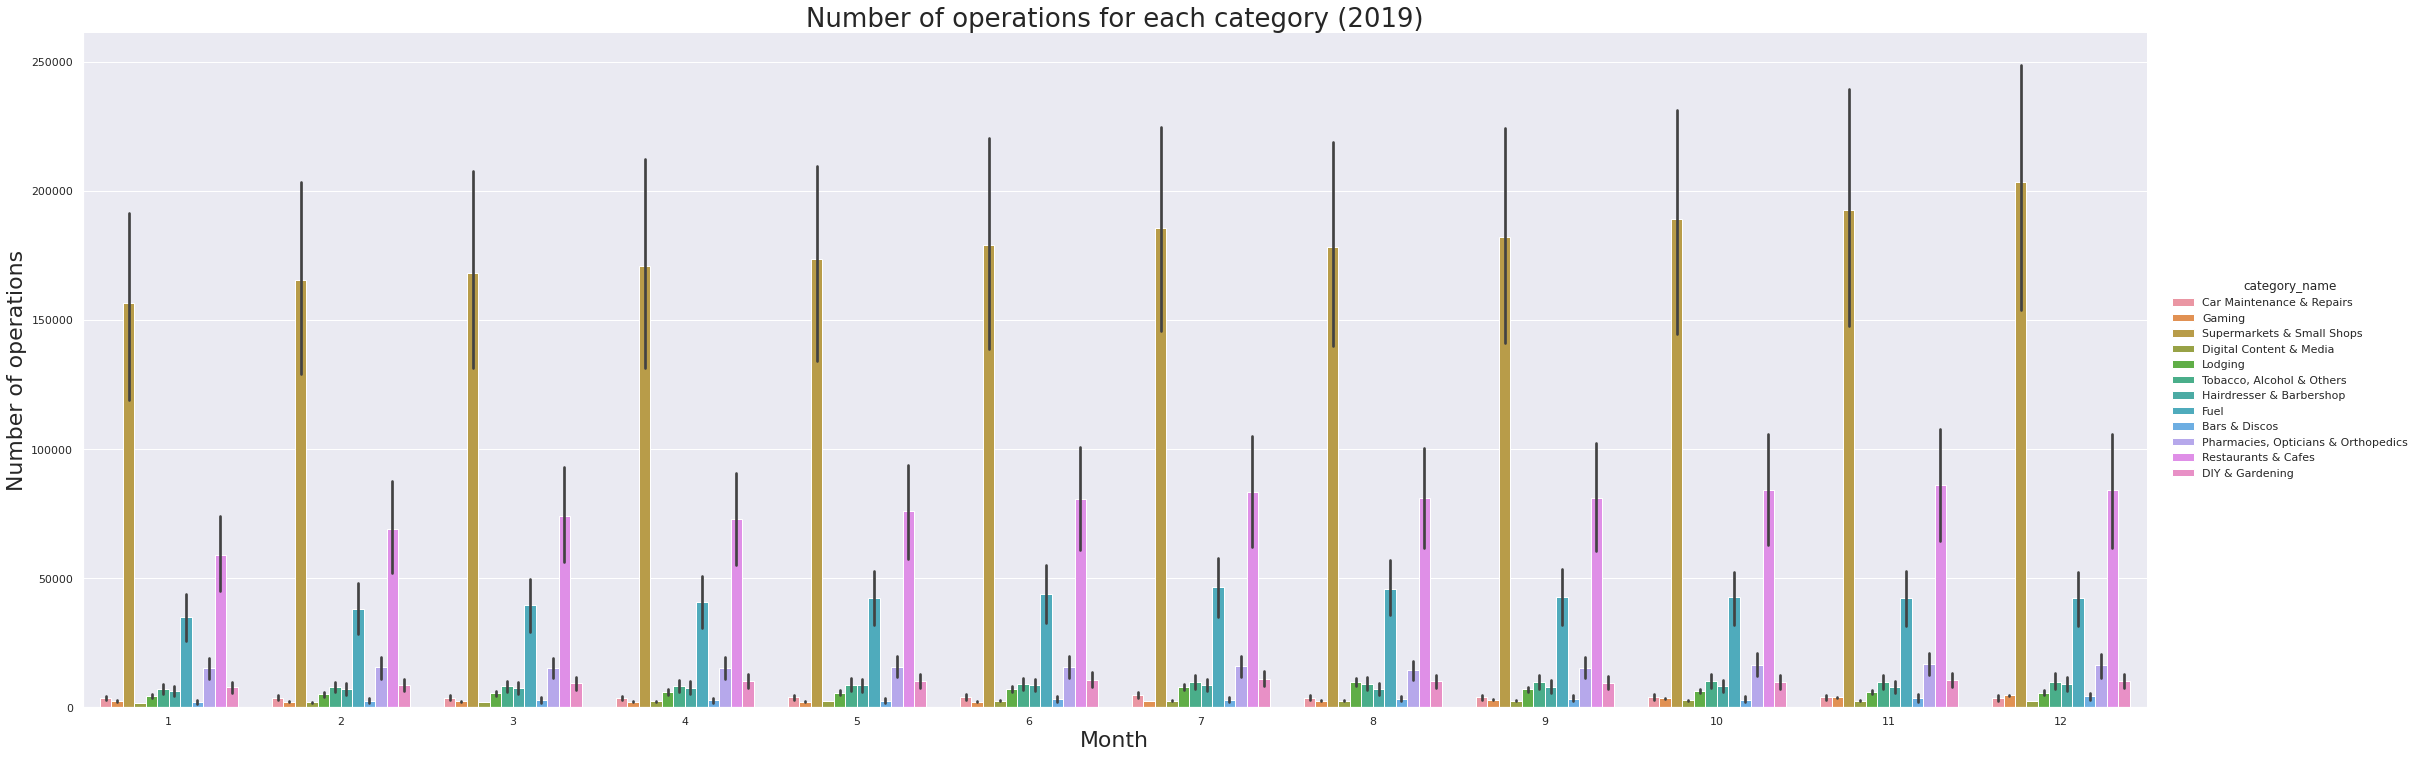

In [68]:
sns.catplot(data=df.loc[df["Year"] == 2019], x='Month', y='operations_number', hue="category_name", kind="bar", height=10, aspect=3)
plt.title("Number of operations for each category (2019)", fontsize=26)
plt.xlabel("Month", fontsize=22)
plt.ylabel("Number of operations", fontsize=22)
plt.show()

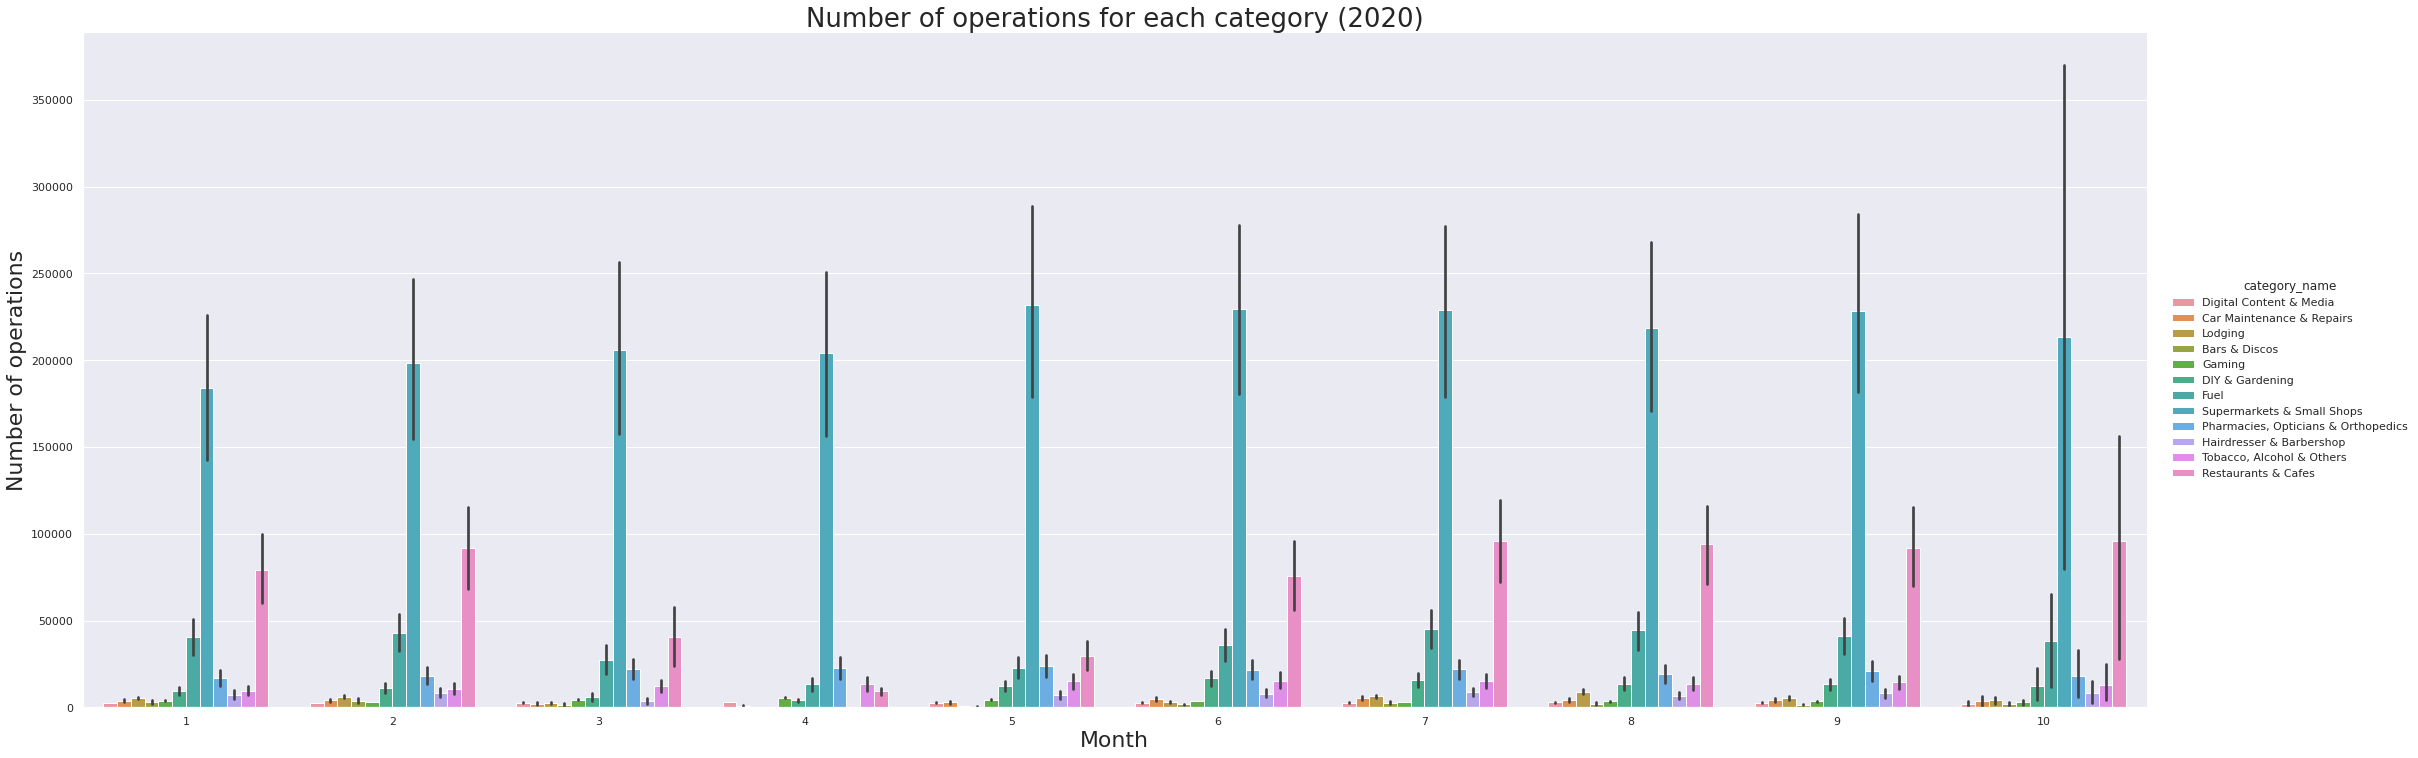

In [69]:
sns.catplot(data=df.loc[df["Year"] == 2020], x='Month', y='operations_number', hue="category_name", kind="bar", height=10, aspect=3)
plt.title("Number of operations for each category (2020)", fontsize=26)
plt.xlabel("Month", fontsize=22)
plt.ylabel("Number of operations", fontsize=22)
plt.show()

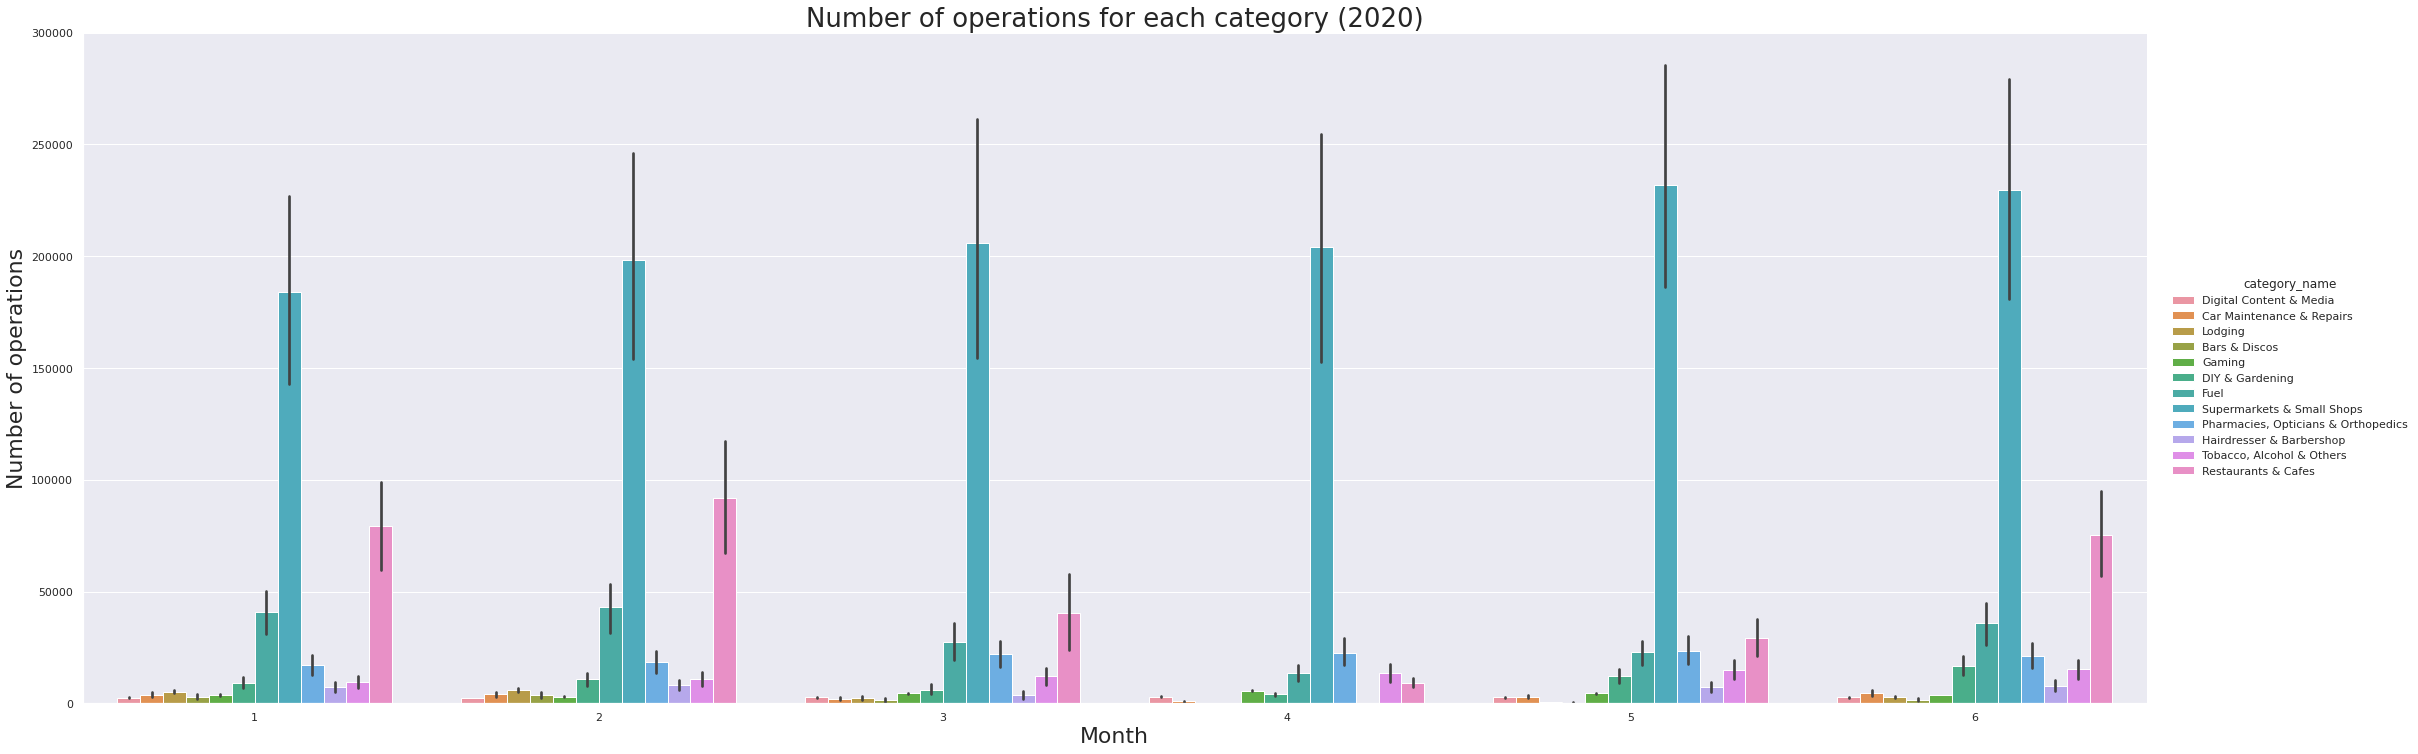

In [70]:
sns.catplot(data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6)], x='Month', y='operations_number', hue="category_name", kind="bar", height=10, aspect=3)
plt.title("Number of operations for each category (2020)", fontsize=26)
plt.xlabel("Month", fontsize=22)
plt.ylabel("Number of operations", fontsize=22)
plt.show()

#### Lineplot every category with Amount and Number of Operations

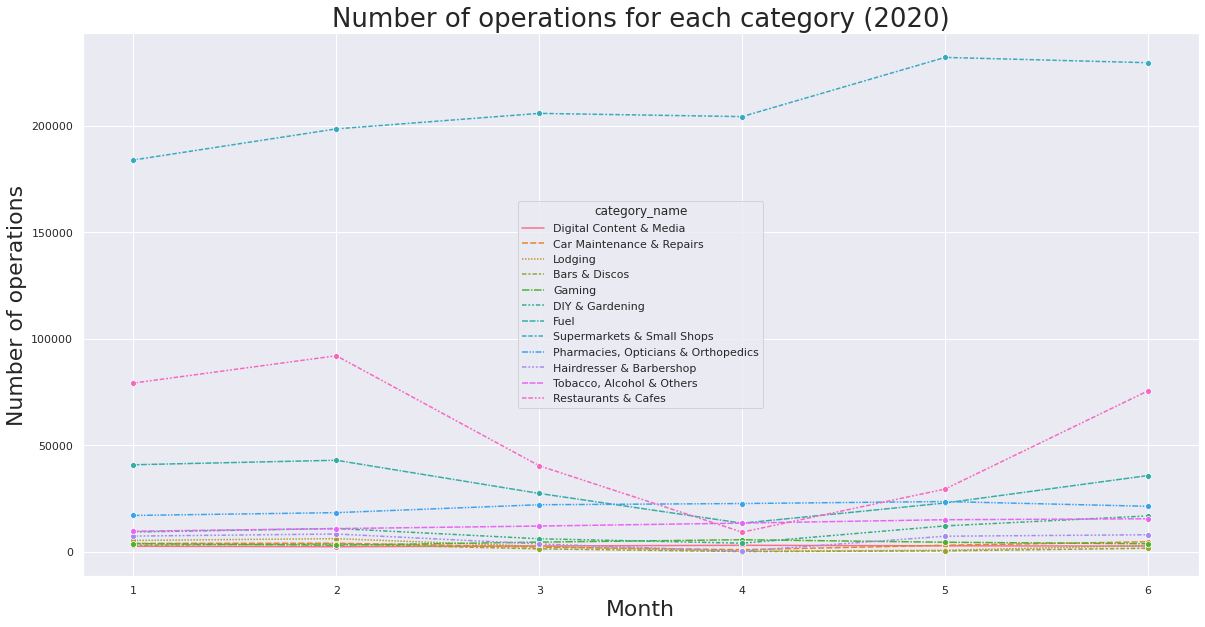

In [71]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6)], x='Month', y='operations_number', hue="category_name", ci=None, marker="o",style="category_name")
plt.title("Number of operations for each category (2020)", fontsize=26)
plt.xlabel("Month", fontsize=22)
plt.ylabel("Number of operations", fontsize=22)
plt.show()

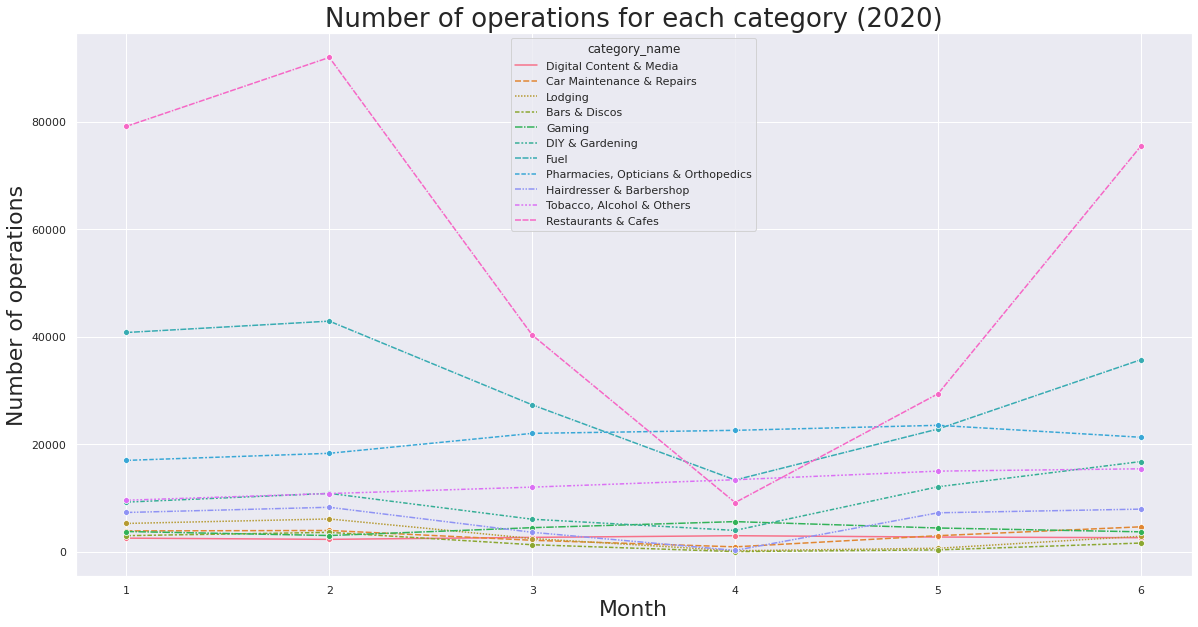

In [72]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] != "Supermarkets & Small Shops")], x='Month', y='operations_number', hue="category_name", ci=None, marker="o",style="category_name")
plt.title("Number of operations for each category (2020)", fontsize=26)
plt.xlabel("Month", fontsize=22)
plt.ylabel("Number of operations", fontsize=22)
plt.show()

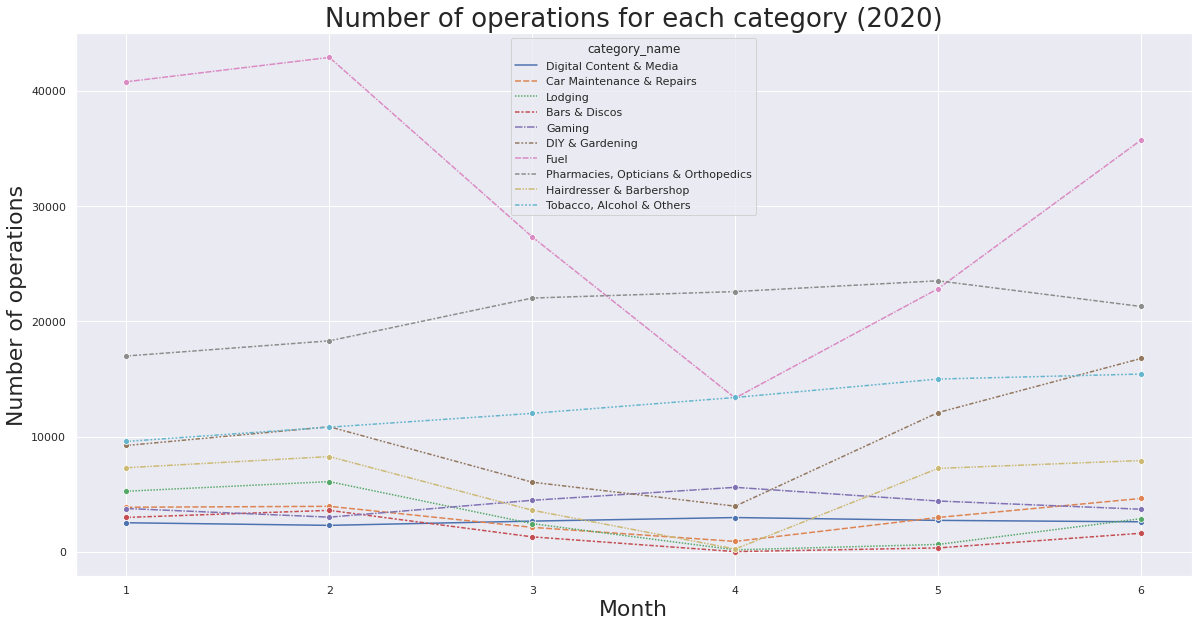

In [73]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] != "Supermarkets & Small Shops") & (df["category_name"] != "Restaurants & Cafes")], x='Month', y='operations_number', hue="category_name", ci=None, marker="o", style="category_name")
plt.title("Number of operations for each category (2020)", fontsize=26)
plt.xlabel("Month", fontsize=22)
plt.ylabel("Number of operations", fontsize=22)
plt.show()

#### Let's focus on each category separately
We'll only focus on months 1-6 to see the effect of the  quarantine due to Covid (in Spain), which was from 15th of march to 15th of may 

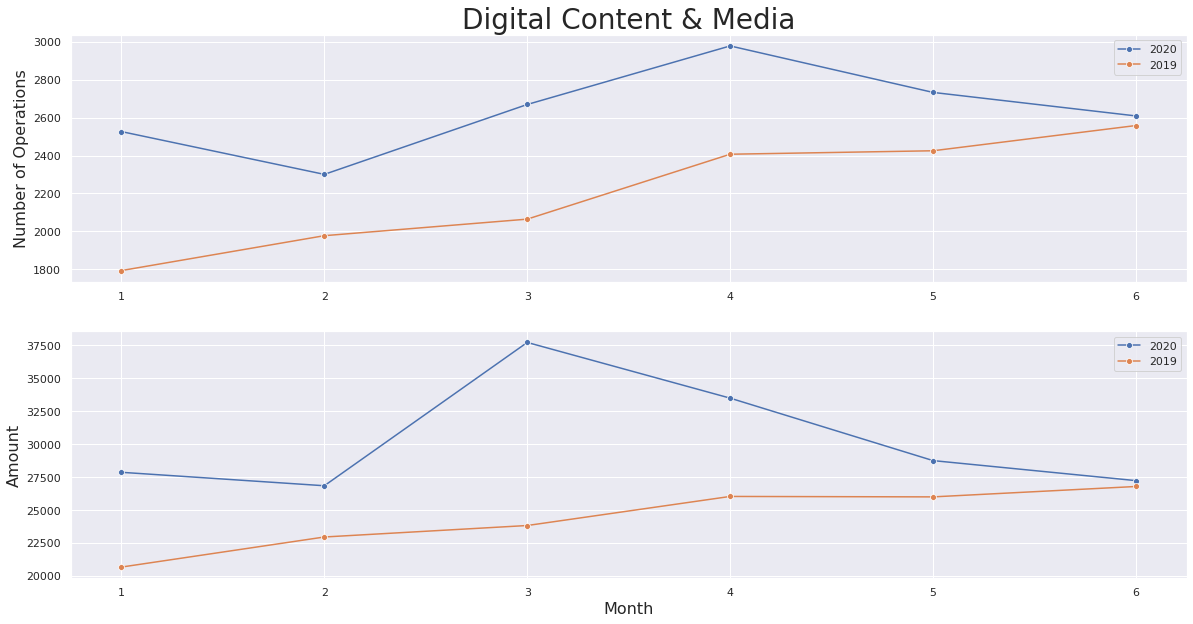

In [74]:
sns.set(rc={'figure.figsize':(20,10)})
fid, axes = plt.subplots(2,1)
categoria = "Digital Content & Media"
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2019", ci=None)

sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2019", ci=None)

axes[0].set_xlabel("", fontsize=16)
axes[1].set_xlabel("Month", fontsize=16)
axes[0].set_ylabel("Number of Operations", fontsize=16)
axes[1].set_ylabel("Amount", fontsize=16)
axes[0].set_title("Digital Content & Media", fontsize=28)
plt.show()

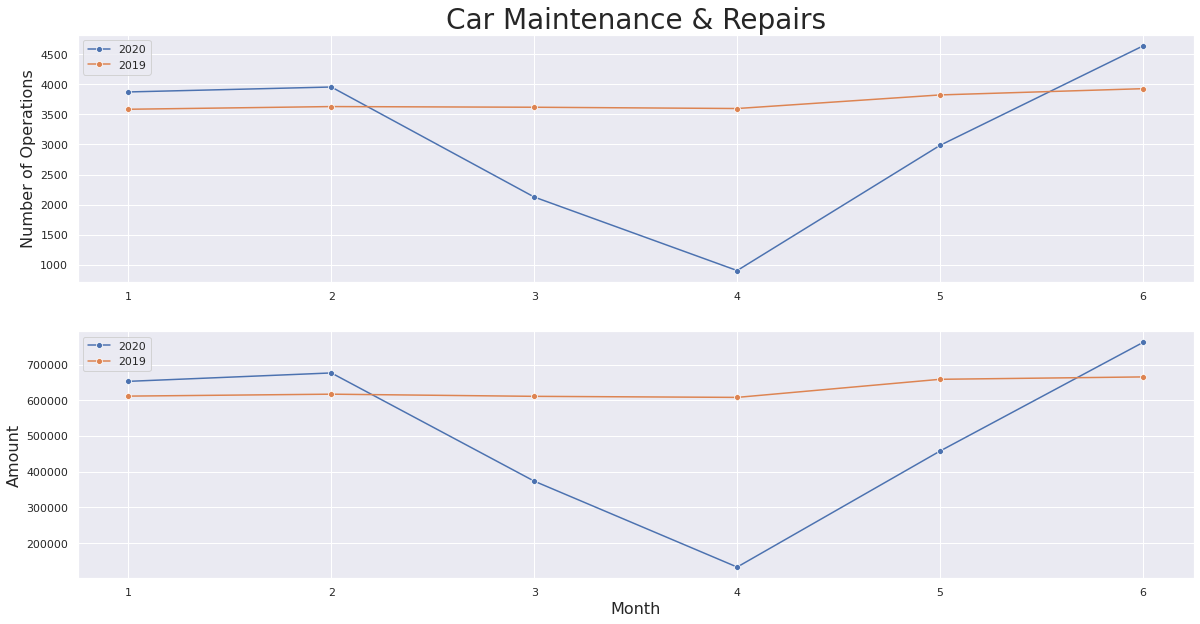

In [75]:
sns.set(rc={'figure.figsize':(20,10)})
fid, axes = plt.subplots(2,1)
categoria = "Car Maintenance & Repairs"
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2019", ci=None)

sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2019", ci=None)

axes[0].set_xlabel("", fontsize=16)
axes[1].set_xlabel("Month", fontsize=16)
axes[0].set_ylabel("Number of Operations", fontsize=16)
axes[1].set_ylabel("Amount", fontsize=16)
axes[0].set_title("Car Maintenance & Repairs", fontsize=28)
plt.show()

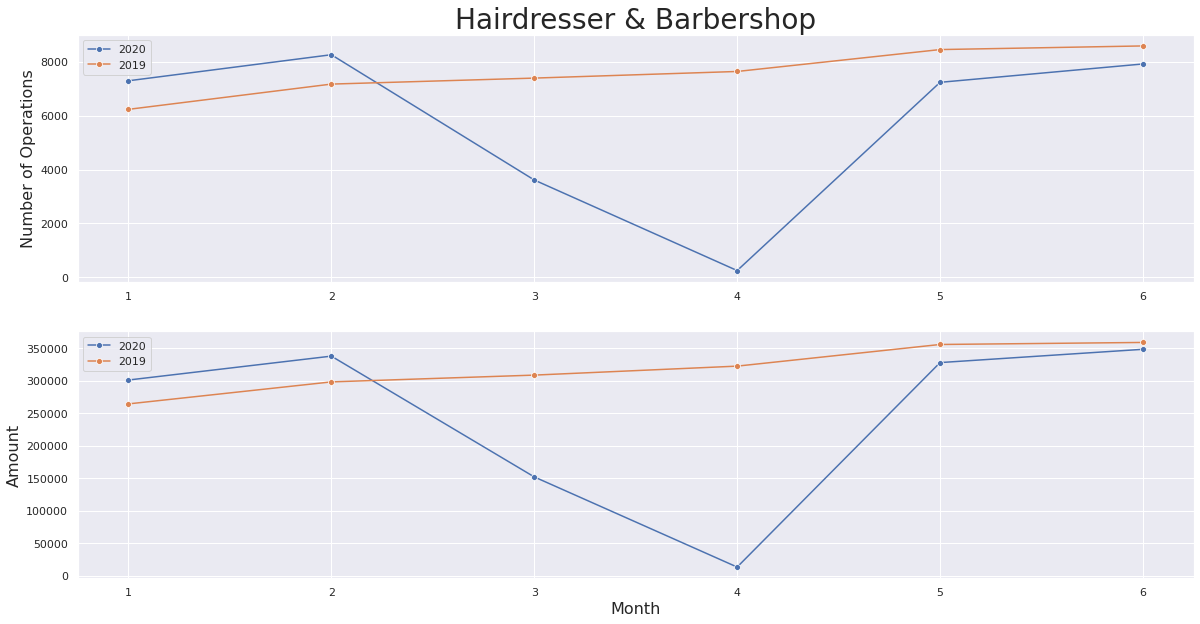

In [76]:
sns.set(rc={'figure.figsize':(20,10)})
fid, axes = plt.subplots(2,1)
categoria = "Hairdresser & Barbershop"
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2019", ci=None)

sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2019", ci=None)

axes[0].set_xlabel("", fontsize=16)
axes[1].set_xlabel("Month", fontsize=16)
axes[0].set_ylabel("Number of Operations", fontsize=16)
axes[1].set_ylabel("Amount", fontsize=16)
axes[0].set_title("Hairdresser & Barbershop", fontsize=28)
plt.show()

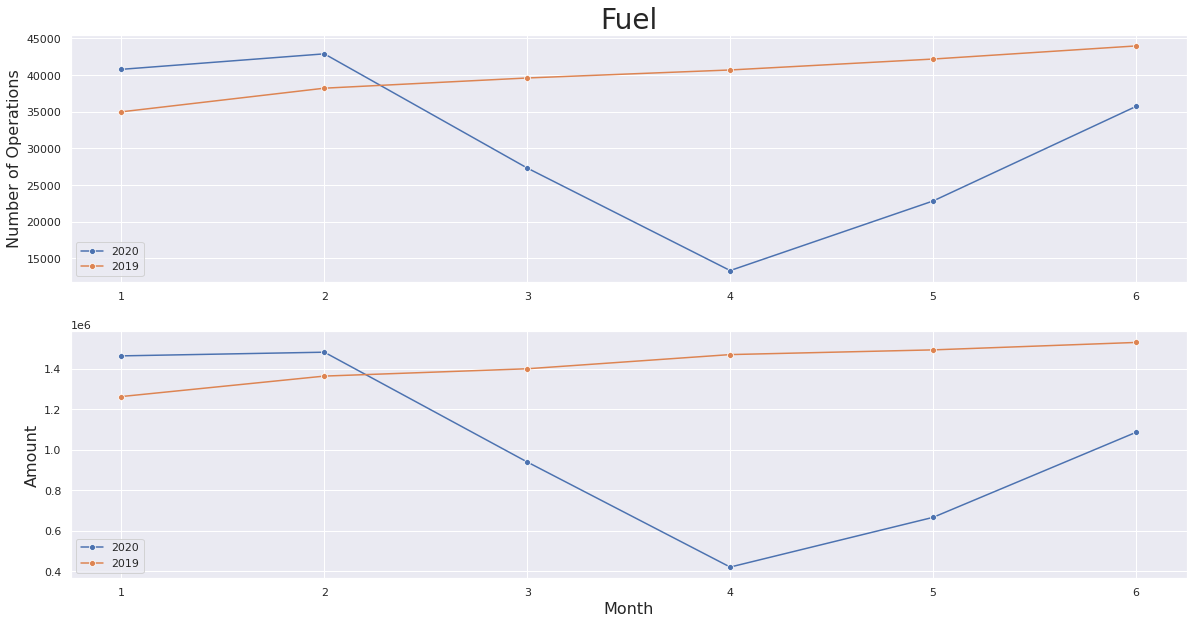

In [77]:
sns.set(rc={'figure.figsize':(20,10)})
fid, axes = plt.subplots(2,1)
categoria = "Fuel"
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2019", ci=None)

sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2019", ci=None)

axes[0].set_xlabel("", fontsize=16)
axes[1].set_xlabel("Month", fontsize=16)
axes[0].set_ylabel("Number of Operations", fontsize=16)
axes[1].set_ylabel("Amount", fontsize=16)
axes[0].set_title("Fuel", fontsize=28)
plt.show()

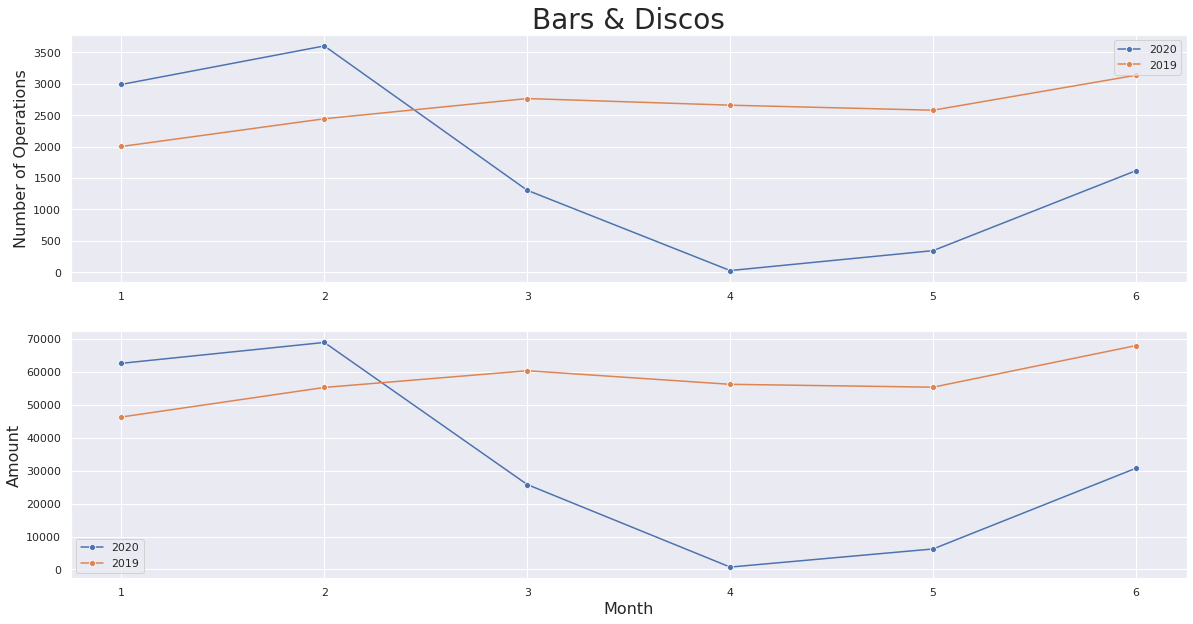

In [78]:
sns.set(rc={'figure.figsize':(20,10)})
fid, axes = plt.subplots(2,1)
categoria = "Bars & Discos"
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2019", ci=None)

sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2019", ci=None)

axes[0].set_xlabel("", fontsize=16)
axes[1].set_xlabel("Month", fontsize=16)
axes[0].set_ylabel("Number of Operations", fontsize=16)
axes[1].set_ylabel("Amount", fontsize=16)
axes[0].set_title("Bars & Discos", fontsize=28)
plt.show()

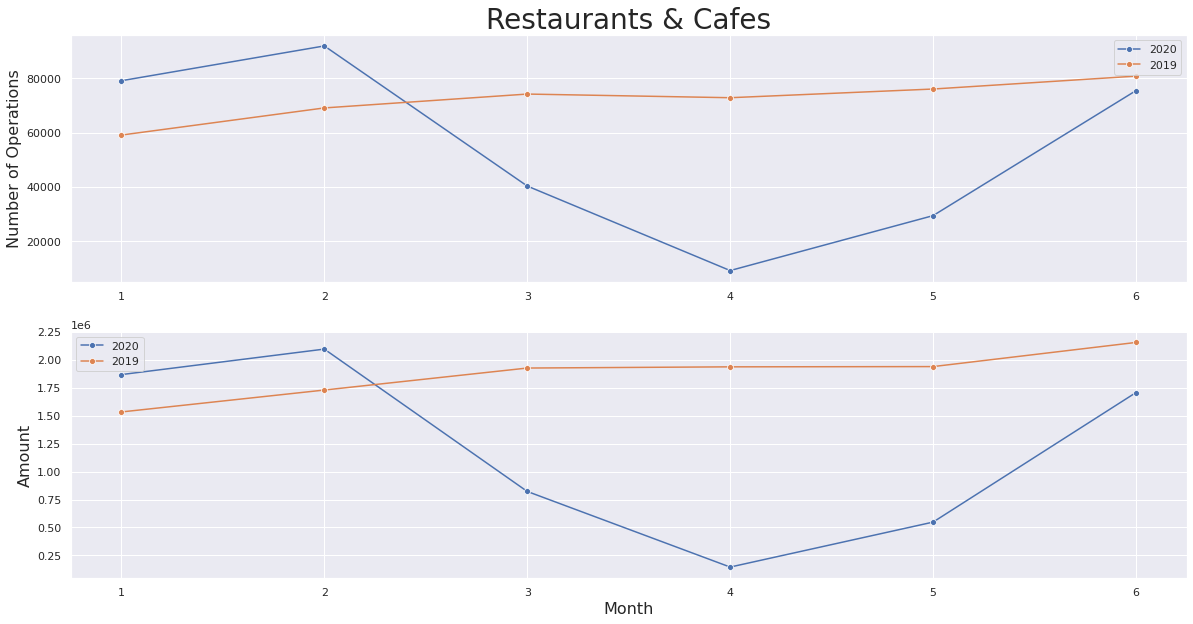

In [79]:
sns.set(rc={'figure.figsize':(20,10)})
fid, axes = plt.subplots(2,1)
categoria = "Restaurants & Cafes"
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2019", ci=None)

sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2019", ci=None)

axes[0].set_xlabel("", fontsize=16)
axes[1].set_xlabel("Month", fontsize=16)
axes[0].set_ylabel("Number of Operations", fontsize=16)
axes[1].set_ylabel("Amount", fontsize=16)
axes[0].set_title("Restaurants & Cafes", fontsize=28)
plt.show()

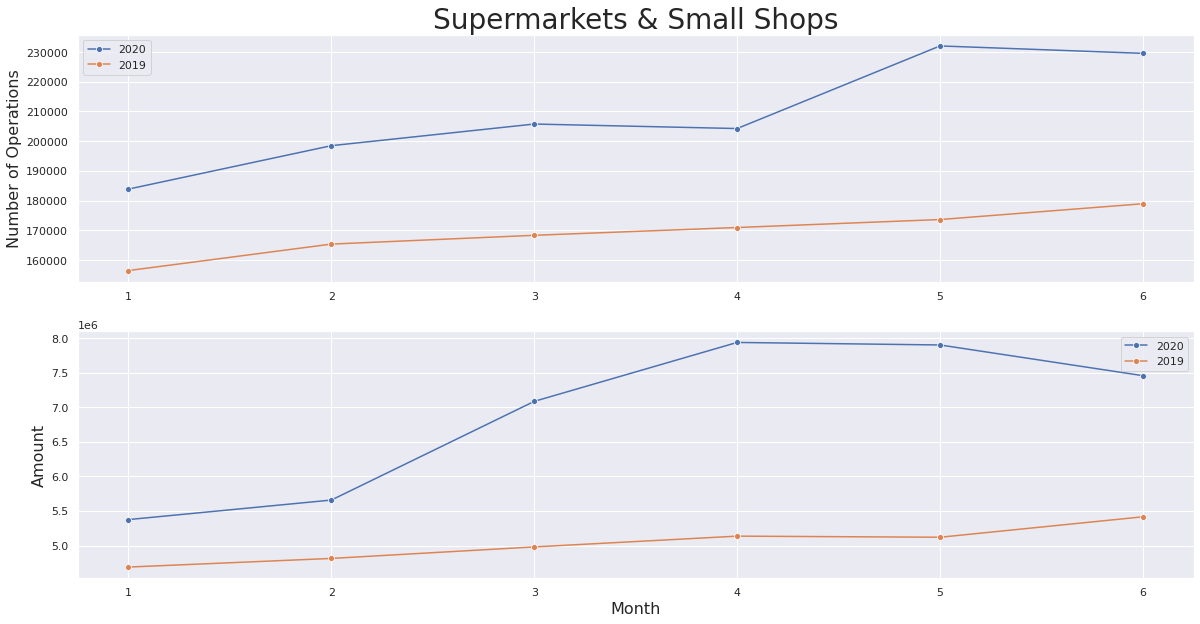

In [80]:
sns.set(rc={'figure.figsize':(20,10)})
fid, axes = plt.subplots(2,1)
categoria = "Supermarkets & Small Shops"
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2019", ci=None)

sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2019", ci=None)

axes[0].set_xlabel("", fontsize=16)
axes[1].set_xlabel("Month", fontsize=16)
axes[0].set_ylabel("Number of Operations", fontsize=16)
axes[1].set_ylabel("Amount", fontsize=16)
axes[0].set_title("Supermarkets & Small Shops", fontsize=28)
plt.show()

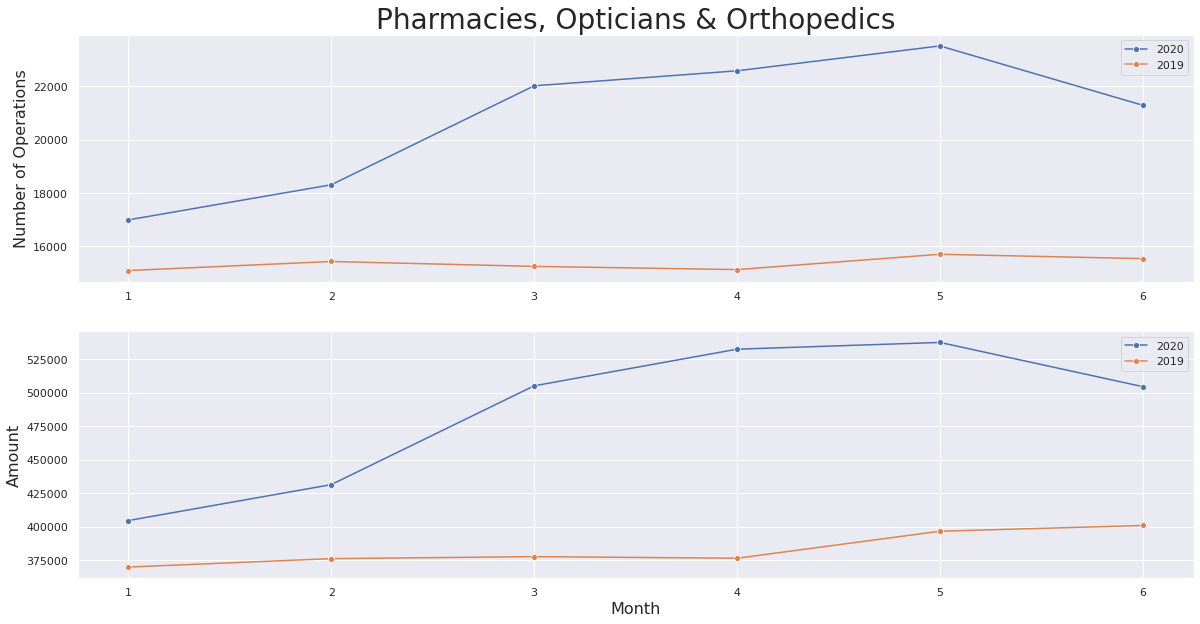

In [81]:
sns.set(rc={'figure.figsize':(20,10)})
fid, axes = plt.subplots(2,1)
categoria = "Pharmacies, Opticians & Orthopedics"
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2019", ci=None)

sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2019", ci=None)

axes[0].set_xlabel("", fontsize=16)
axes[1].set_xlabel("Month", fontsize=16)
axes[0].set_ylabel("Number of Operations", fontsize=16)
axes[1].set_ylabel("Amount", fontsize=16)
axes[0].set_title("Pharmacies, Opticians & Orthopedics", fontsize=28)
plt.show()

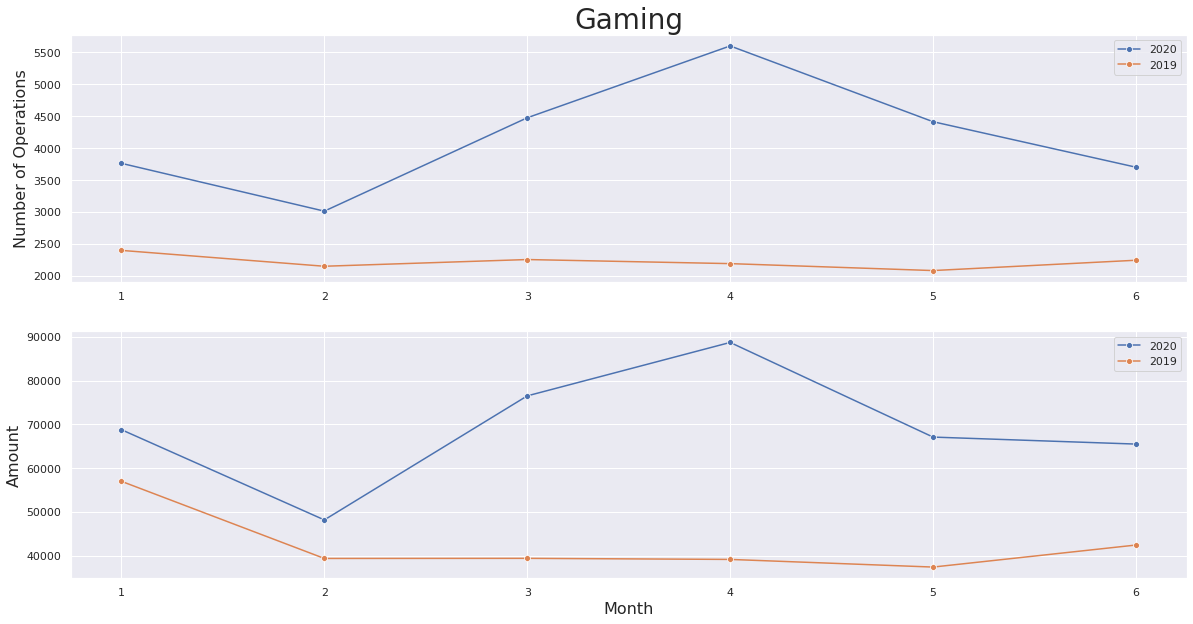

In [82]:
sns.set(rc={'figure.figsize':(20,10)})
fid, axes = plt.subplots(2,1)
categoria = "Gaming"
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2019", ci=None)

sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2019", ci=None)

axes[0].set_xlabel("", fontsize=16)
axes[1].set_xlabel("Month", fontsize=16)
axes[0].set_ylabel("Number of Operations", fontsize=16)
axes[1].set_ylabel("Amount", fontsize=16)
axes[0].set_title("Gaming", fontsize=28)
plt.show()

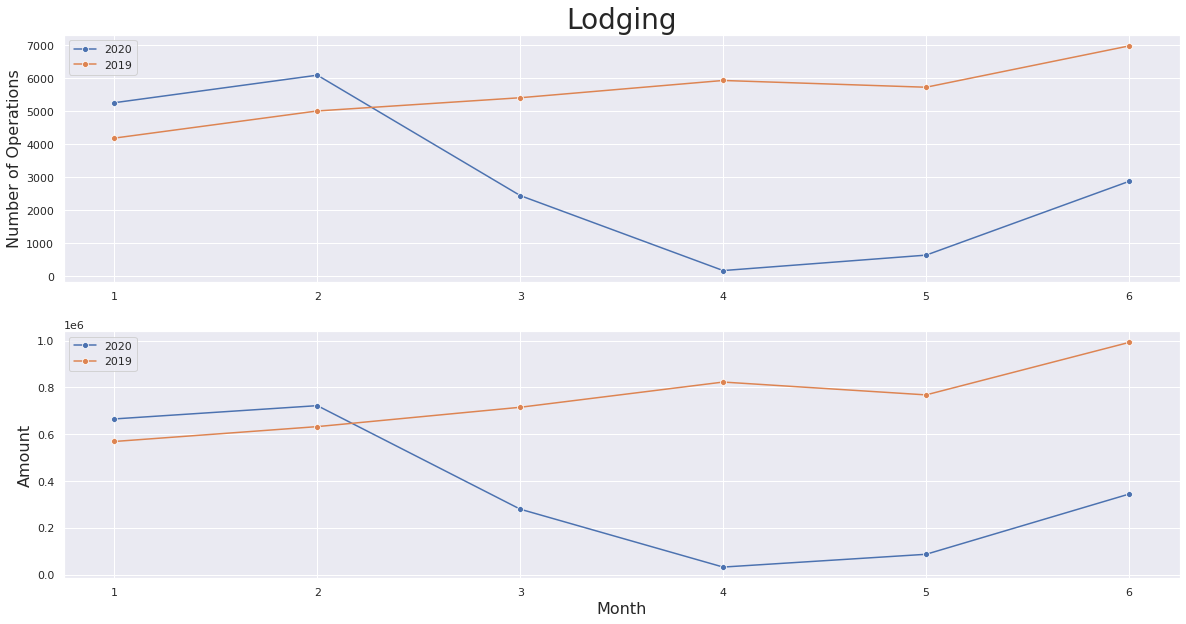

In [83]:
sns.set(rc={'figure.figsize':(20,10)})
fid, axes = plt.subplots(2,1)
categoria = "Lodging"
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2019", ci=None)

sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2019", ci=None)

axes[0].set_xlabel("", fontsize=16)
axes[1].set_xlabel("Month", fontsize=16)
axes[0].set_ylabel("Number of Operations", fontsize=16)
axes[1].set_ylabel("Amount", fontsize=16)
axes[0].set_title("Lodging", fontsize=28)
plt.show()

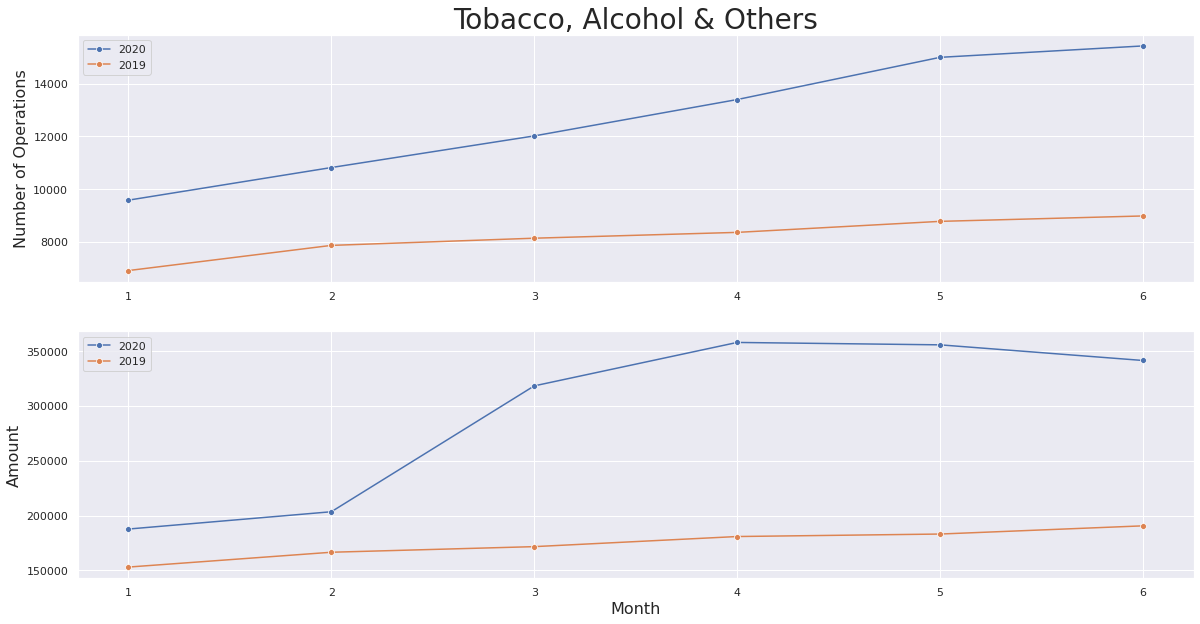

In [84]:
sns.set(rc={'figure.figsize':(20,10)})
fid, axes = plt.subplots(2,1)
categoria = "Tobacco, Alcohol & Others"
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2019", ci=None)

sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2019", ci=None)

axes[0].set_xlabel("", fontsize=16)
axes[1].set_xlabel("Month", fontsize=16)
axes[0].set_ylabel("Number of Operations", fontsize=16)
axes[1].set_ylabel("Amount", fontsize=16)
axes[0].set_title("Tobacco, Alcohol & Others", fontsize=28)
plt.show()

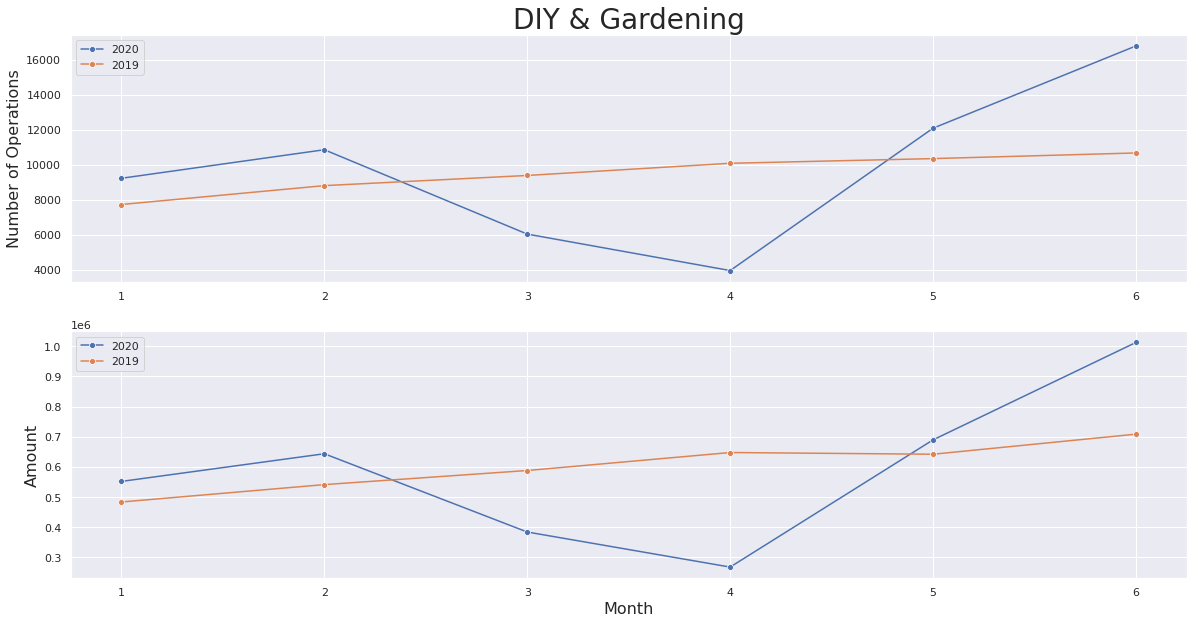

In [85]:
sns.set(rc={'figure.figsize':(20,10)})
fid, axes = plt.subplots(2,1)
categoria = "DIY & Gardening"
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[0], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='operations_number', marker="o", label="2019", ci=None)

sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2020) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2020", palette="rocket", ci=None)
sns.lineplot(ax=axes[1], data=df.loc[(df["Year"] == 2019) & (df["Month"] <= 6) & (df["category_name"] == categoria)], x='Month', y='amount', marker="o", label="2019", ci=None)

axes[0].set_xlabel("", fontsize=16)
axes[1].set_xlabel("Month", fontsize=16)
axes[0].set_ylabel("Number of Operations", fontsize=16)
axes[1].set_ylabel("Amount", fontsize=16)
axes[0].set_title("DIY & Gardening", fontsize=28)
plt.show()

### Conclusion:

As we can see in the plots above, some of the most negatively affected categories are:
*   Car Maintenance & Repairs
*   Lodging
*   Hairdresser & Barbershop
*   Fuel
*   Bars & Discos
*   Restaurants & Cafes
*   DIY & Gardening

On the other hand, some categories were positively affected by Covid:
*   Digital Content & Media
*   Gaming
*   Supermarkets & Small Shops
*   Pharmacies, Opticians & Orthopedics
*   Tobacco, Alcohol & Others


We can see that some of the negatively affected purchasing categories are almost zero in April. The reason is that in March and May the quarantine didn't last the entire month.